In [231]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [183]:
filename="/Users/mufseeramusthafa/Documents/deeplearning_krish/audio/UrbanSound8K/audio/fold2/4201-3-1-0.wav"

22050


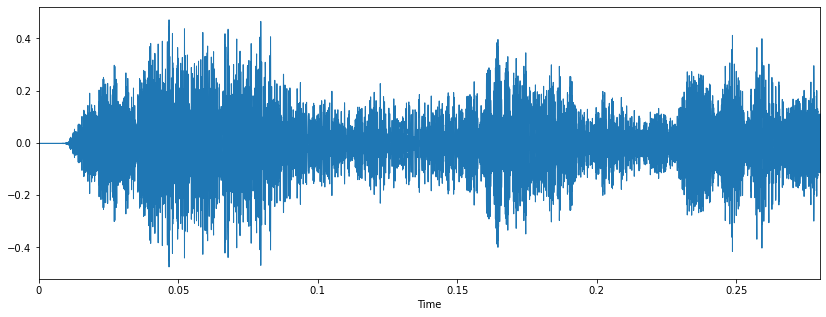

In [184]:
# example
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
print(sample_rate)
# read that file
ipd.Audio(filename)

In [185]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.03159269,
       -0.08477292, -0.11285392], dtype=float32)

In [186]:
# how many time per second how many sound sampled.its mono type[librosa](information equally)
sample_rate

22050

In [187]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [188]:
wave_sample_rate

44100

In [189]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-3591, -3050],
       [-3659, -3469],
       [-3279, -3609]], dtype=int16)

In [190]:
# in librosa data are normalised.its is mono and default convert sample rate to 22 khz
data

array([ 0.        ,  0.        ,  0.        , ..., -0.03159269,
       -0.08477292, -0.11285392], dtype=float32)

In [191]:
metadata=pd.read_csv("/Users/mufseeramusthafa/Documents/deeplearning_krish/\
audio/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [192]:
# check whether the dataset is balanced or imbalanced
metadata["class"].value_counts()

street_music        1000
air_conditioner     1000
drilling            1000
jackhammer          1000
engine_idling       1000
dog_bark            1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [193]:
metadata.isna().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

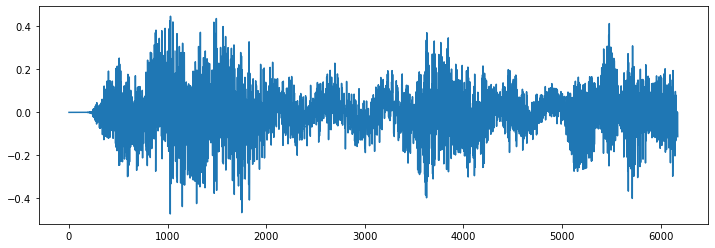

In [194]:
plt.figure(figsize=(12,4))
plt.plot(data)

In [195]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-3591, -3050],
       [-3659, -3469],
       [-3279, -3609]], dtype=int16)

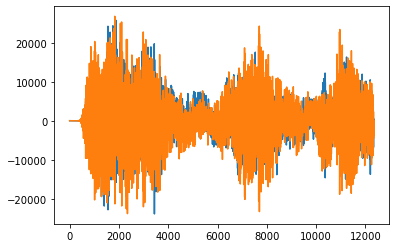

In [196]:
# here is two channnel stereo
plt.plot(wave_audio)
plt.show()

## extract features

In [248]:
# by using mel_frequency cepstral coeficients.create features based on the time and frequency
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
# print(mfccs)
# np.mean(mfccs.T,axis=0)


In [199]:
audio_dataset_path="/Users/mufseeramusthafa/Documents/deeplearning_krish/audio/UrbanSound8K/audio/"

In [200]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [201]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3552it [01:55, 31.26it/s]/Users/mufseeramusthafa/miniforge3/envs/keras/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8322it [04:22, 43.00it/s]/Users/mufseeramusthafa/miniforge3/envs/keras/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/Users/mufseeramusthafa/miniforge3/envs/keras/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [04:33, 31.87it/s]


In [202]:
extracted_features

[[array([-2.1579301e+02,  7.1666122e+01, -1.3181377e+02, -5.2091328e+01,
         -2.2115969e+01, -2.1764179e+01, -1.1183746e+01,  1.8912683e+01,
          6.7266383e+00,  1.4556894e+01, -1.1782045e+01,  2.3010368e+00,
         -1.7251303e+01,  1.0052423e+01, -6.0094995e+00, -1.3153189e+00,
         -1.7693510e+01,  1.1171225e+00, -4.3699460e+00,  7.2629538e+00,
         -1.1815970e+01, -7.4952617e+00,  5.4577127e+00, -2.9442444e+00,
         -5.8693881e+00, -9.8653965e-02, -3.2121704e+00,  4.6092515e+00,
         -5.8293266e+00, -5.3475080e+00,  1.3341200e+00,  7.1307821e+00,
         -7.9450019e-02,  1.7109245e+00, -5.6941996e+00, -2.9041715e+00,
          3.0366950e+00, -1.6827589e+00, -8.8585860e-01,  3.5438877e-01],
        dtype=float32),
  'dog_bark'],
 [array([-4.2468683e+02,  1.1056227e+02, -5.4148235e+01,  6.2010731e+01,
         -7.0951575e-01,  1.8157396e+01,  1.4451563e+00,  1.1161131e+01,
         -1.7058899e+00,  1.2360451e+01, -1.1055476e+01,  2.0736568e+01,
         -8

In [203]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68683, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [204]:
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68683, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [205]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [206]:
x.shape

(8732, 40)

In [207]:
# y=pd.get_dummies(y)
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [208]:
y.shape

(8732, 10)

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [210]:
x_train.shape

(6985, 40)

In [211]:
x_test.shape

(1747, 40)

In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [214]:
y_test.shape

(1747, 10)

In [215]:
### No of classes
num_labels=y.shape[1]

In [216]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [224]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [225]:
## Trianing my model
# from tensorflow.keras.callbacks import ModelCheckpoint
# from datetime import datetime 

num_epochs = 100
num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
#                                verbose=1, save_best_only=True)
# start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)


# duration = datetime.now() - start
# print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 0s 915us/step - loss: 13.1613 - accuracy: 0.2189 - val_loss: 79.0294 - val_accuracy: 0.1511
Epoch 2/100
219/219 [==============================] - 0s 547us/step - loss: 12.8010 - accuracy: 0.2292 - val_loss: 63.8802 - val_accuracy: 0.1494
Epoch 3/100
219/219 [==============================] - 0s 540us/step - loss: 12.1483 - accuracy: 0.2333 - val_loss: 37.2496 - val_accuracy: 0.1534
Epoch 4/100
219/219 [==============================] - 0s 543us/step - loss: 13.5189 - accuracy: 0.2389 - val_loss: 22.3488 - val_accuracy: 0.1597
Epoch 5/100
219/219 [==============================] - 0s 544us/step - loss: 12.7767 - accuracy: 0.2309 - val_loss: 56.7700 - val_accuracy: 0.1546
Epoch 6/100
219/219 [==============================] - 0s 549us/step - loss: 11.9912 - accuracy: 0.2296 - val_loss: 88.7784 - val_accuracy: 0.1420
Epoch 7/100
219/219 [==============================] - 0s 538us/step - loss: 12.5167 - accuracy: 0.2333 - val_loss: 39

219/219 [==============================] - 0s 545us/step - loss: 12.3620 - accuracy: 0.2287 - val_loss: 27.4916 - val_accuracy: 0.1574
Epoch 57/100
219/219 [==============================] - 0s 536us/step - loss: 11.6021 - accuracy: 0.2254 - val_loss: 64.6127 - val_accuracy: 0.1374
Epoch 58/100
219/219 [==============================] - 0s 528us/step - loss: 12.5136 - accuracy: 0.2307 - val_loss: 50.0863 - val_accuracy: 0.1448
Epoch 59/100
219/219 [==============================] - 0s 1ms/step - loss: 11.3855 - accuracy: 0.2347 - val_loss: 52.1482 - val_accuracy: 0.1483
Epoch 60/100
219/219 [==============================] - 0s 543us/step - loss: 12.2505 - accuracy: 0.2266 - val_loss: 69.4233 - val_accuracy: 0.1528
Epoch 61/100
219/219 [==============================] - 0s 552us/step - loss: 13.3998 - accuracy: 0.2175 - val_loss: 62.2220 - val_accuracy: 0.1488
Epoch 62/100
219/219 [==============================] - 0s 539us/step - loss: 11.6930 - accuracy: 0.2236 - val_loss: 82.5782 - 

In [226]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.157985121011734


In [227]:
test_accuracy=model.evaluate(x_test,y_test)

55/55 [==============================] - 0s 418us/step - loss: 68.7250 - accuracy: 0.1580


In [228]:
test_accuracy

[68.72498321533203, 0.157985121011734]

In [232]:
filename="/Users/mufseeramusthafa/Documents/deeplearning_krish/audio/UrbanSound8K/audio/fold2/4201-3-1-0.wav"
prediction_feature=feature_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

/Users/mufseeramusthafa/miniforge3/envs/keras/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

In [240]:
filename="/Users/mufseeramusthafa/Documents/deeplearning_krish/audio/UrbanSound8K/audio/fold2/4201-3-1-0.wav"
audio,sample_rate=librosa.load(filename,res_type="kaiser_fast")
mfcc_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfcc_scaled_features=np.mean(mfcc_features.T,axis=0)
mfcc_scaled_features=mfcc_scaled_features.reshape(1,-1)
print(mfcc_scaled_features.shape)
predicted_label=model.predict_classes(mfcc_scaled_features)
print(predicted_label)
prediction_class=labelencoder.inverse_transform(predicted_label)
prediction_class

(1, 40)
[0]


array(['air_conditioner'], dtype='<U16')